In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys() #identify the keys in the hawaii database

['measurement', 'station']

In [11]:
# Save references to each table
Measurements=Base.classes.measurement #reflect the hawaii measurements into a "Measurements" table
Stations=Base.classes.station #reflect the hawaii stations into a "Stations" table

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
#session.query(Measurements.date).order_by(Measurements.date.desc()).first() #find the last date in the measurements table (2017-08-23)
#1 year from last data point '2016-08-23'
last_date=session.query(func.max(Measurements.date)).first() #find the last date in the measurements table (2017-08-23)
print(last_date[0])
#1 year from last data point '2016-08-23'
#print(str(last_date).replace("-", ","))
twelve_months=dt.date(2017, 8, 23)-dt.timedelta(days=365)
print(twelve_months)

2017-08-23
2016-08-23


            Date  Prcp
0     2016-08-23  0.00
1009  2016-08-23   NaN
1529  2016-08-23  1.79
704   2016-08-23  0.05
361   2016-08-23  0.15
...          ...   ...
1527  2017-08-22  0.00
1008  2017-08-23  0.00
360   2017-08-23  0.00
1528  2017-08-23  0.08
2229  2017-08-23  0.45

[2230 rows x 2 columns]


Text(0, 0.5, 'Precipitation (inches)')

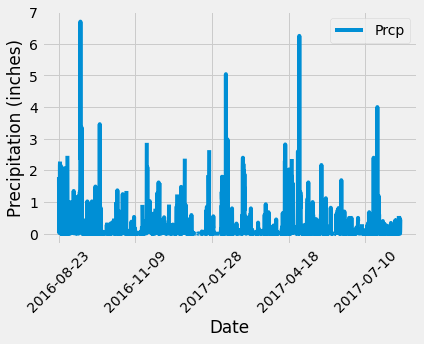

In [39]:
# Perform a query to retrieve the date and precipitation scores
climate_results=session.query(Measurements.date, Measurements.prcp).\
    filter(Measurements.date >= twelve_months).all()
climate_results

# Save the query results as a Pandas DataFrame and set the index to the date column
import pandas as pd
df=pd.DataFrame(climate_results, columns=['Date', 'Prcp'])


# Sort the dataframe by date
df=df.sort_values(by="Date")
print(df)
# Use Pandas Plotting with Matplotlib to plot the data
import matplotlib.pyplot as plt
df.plot(x="Date", y="Prcp", rot=45)
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title()

In [41]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
